<center><img src =  ></center>

# **<center><font color='black'>K.J Somaiya College of Engineering</font></center>**

## <center><font color='red'>Engineering Final Year Project</font></center>

## <center>**<font color='purple'>InsureBuddy - An Insurance Recommender System</font></center>**


### **Author:**
### **Sujay Torvi**
### Co-Authors:
### 1. Krupen Shah
### 2. Harsh Somaiya
### 3. Tirth Desai

### Copyright© 2020 Under MIT License 

## **<font color='purple'>`Problem Statement: To process, analyse and mine the data for useful insights in insurance product recommendation and model them using various algorithms, and deploying them into an application which would provide the user with best insurance product recommendations`</font>**

## **II. Dataset Visualization & Analysis**

## **Source of Dataset:**
### **Zimnnat Insurance Recommendation Dataset**

URL: https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge

<br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [ ]:
from google.colab import files
u = files.upload()

In [ ]:
train = pd.read_csv('Final_Train.csv')

In [ ]:
train = train[train.columns[1:]]
policies = train.columns[6:]

In [ ]:
train.head()

,ID,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5,Policy 6,Policy 7,Policy 8,Policy 9,Policy 10,Policy 11,Policy 12,Policy 13,Policy 14,Policy 15,Policy 16,Policy 17,Policy 18,Policy 19,Policy 20,Policy 21
0,4WKQSBB,F,M,25-40,Corporate Employee,5-10 lac,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,Corporate Employee,10-20 lac,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,M,S,25-40,Self Employed,10-20 lac,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,M,M,25-40,Medical Professional,10-20 lac,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,M,M,25-40,Corporate Employee,10-20 lac,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
data = train

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [ ]:
def o_plot(target_col,target_class):
  corp = data[data[target_col] == target_class]
  lst = []
  for i in range(1,22):
    lst.append(len(corp[corp['Policy ' +str(i)] == 1]))
  plt.bar(policies, lst, color ='purple',  
          width = 0.8) 
  plt.xlabel("Policies")
  plt.xticks(rotation = 90) 
  plt.ylabel("Count") 
  plt.title("No . of {} who were recommended policy".format(target_class)) 
  plt.show()

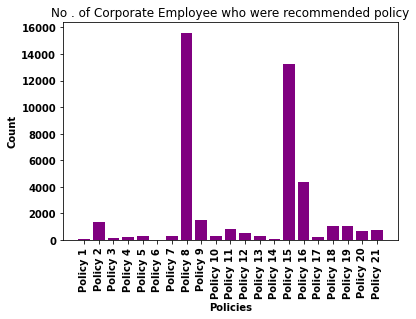

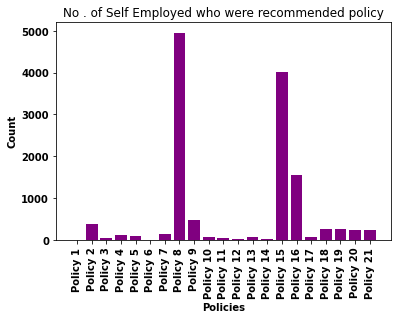

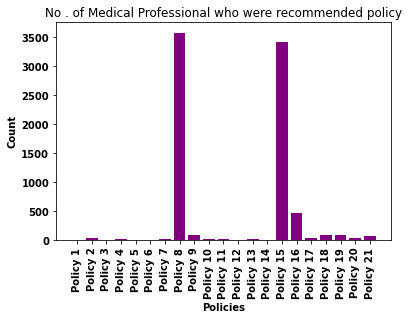

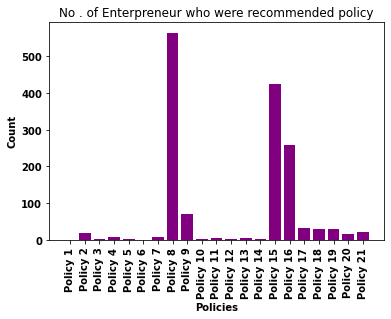

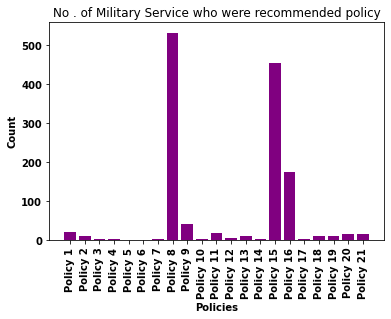

In [ ]:
o_plot('occupation_category_code','Corporate Employee')
o_plot('occupation_category_code','Self Employed')
o_plot('occupation_category_code','Medical Professional')
o_plot('occupation_category_code','Enterpreneur')
o_plot('occupation_category_code','Military Service')
plt.show()

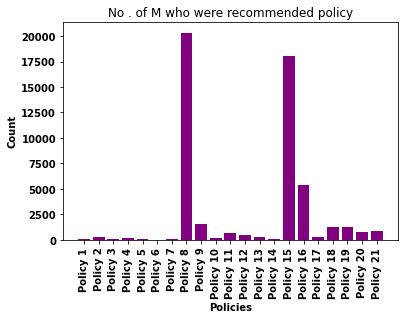

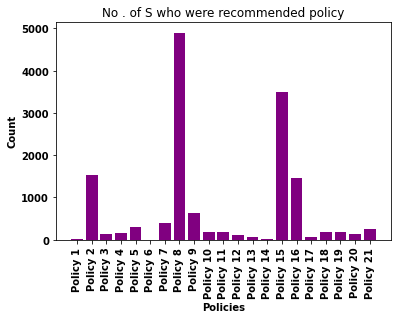

In [ ]:
o_plot('marital_status','M')
o_plot('marital_status','S')
plt.show()

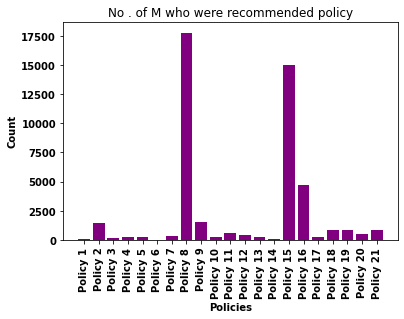

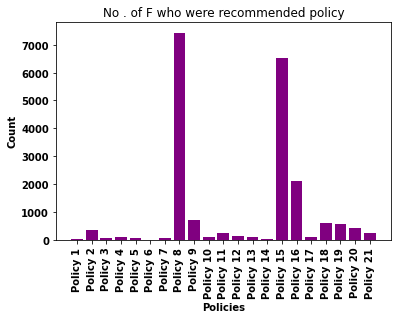

In [ ]:
o_plot('sex','M')
o_plot('sex','F')
plt.show()

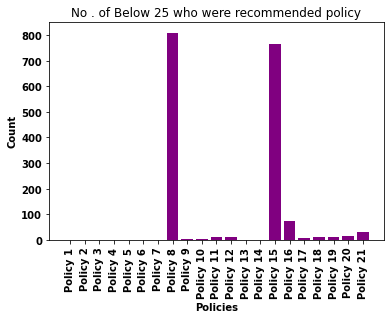

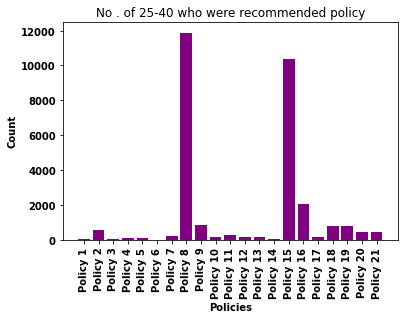

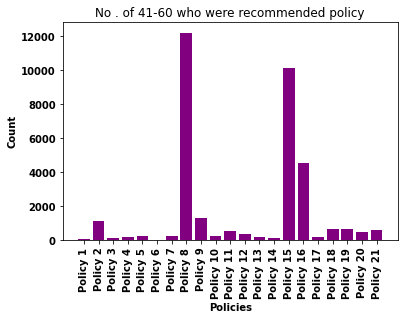

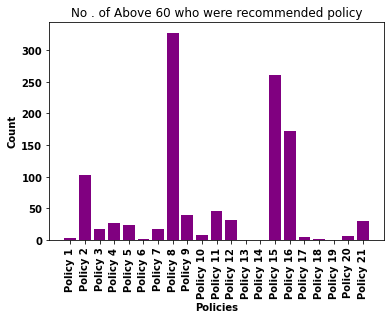

In [ ]:
o_plot('age_group','Below 25')
o_plot('age_group','25-40')
o_plot('age_group','41-60')
o_plot('age_group','Above 60')
plt.show()

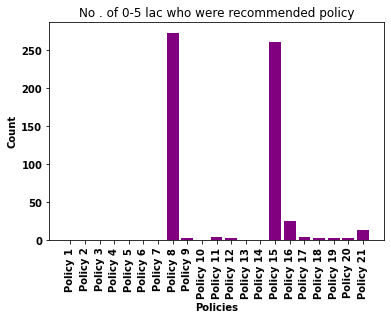

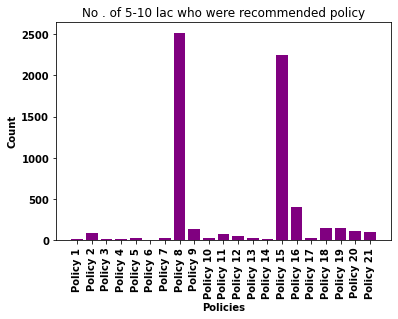

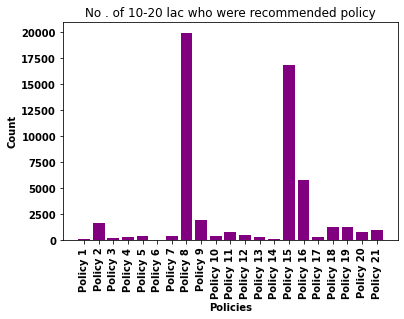

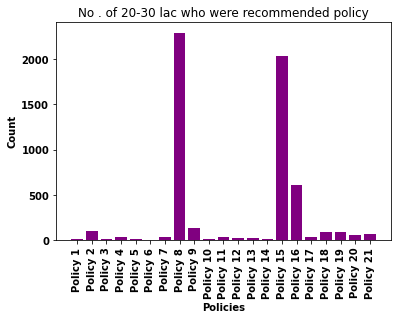

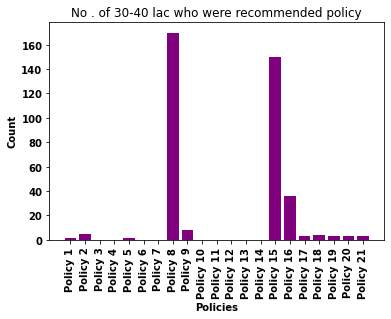

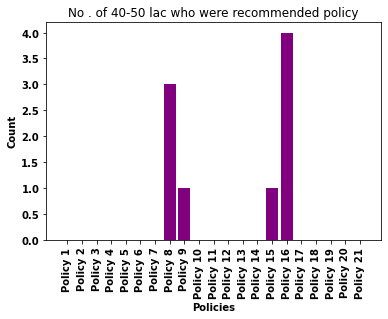

In [ ]:
o_plot('Annual_Income','0-5 lac')
o_plot('Annual_Income','5-10 lac')
o_plot('Annual_Income','10-20 lac')
o_plot('Annual_Income','20-30 lac')
o_plot('Annual_Income','30-40 lac')
o_plot('Annual_Income','40-50 lac')


plt.show()

### In the above plots policy 8 and policy 15 dominate the frequency of users in dataset(a definitely likely case of label class imbalance)

### For the other policies we can see that some of the policies have been taken more or less among the various classess of various features

In [ ]:
newdata = data[['sex','marital_status','age_group','occupation_category_code','Annual_Income']]
newdata.head()

,sex,marital_status,age_group,occupation_category_code,Annual_Income
0,F,M,25-40,Corporate Employee,5-10 lac
1,F,M,25-40,Corporate Employee,10-20 lac
2,M,S,25-40,Self Employed,10-20 lac
3,M,M,25-40,Medical Professional,10-20 lac
4,M,M,25-40,Corporate Employee,10-20 lac


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df = pd.DataFrame(newdata.apply(preprocessing.LabelEncoder().fit_transform))

In [ ]:
df_ = pd.DataFrame(data[data.columns[1:]].apply(preprocessing.LabelEncoder().fit_transform))

In [ ]:
df.head()

,sex,marital_status,age_group,occupation_category_code,Annual_Income
0,0,0,0,0,5
1,0,0,0,0,1
2,1,1,0,4,1
3,1,0,0,2,1
4,1,0,0,0,1


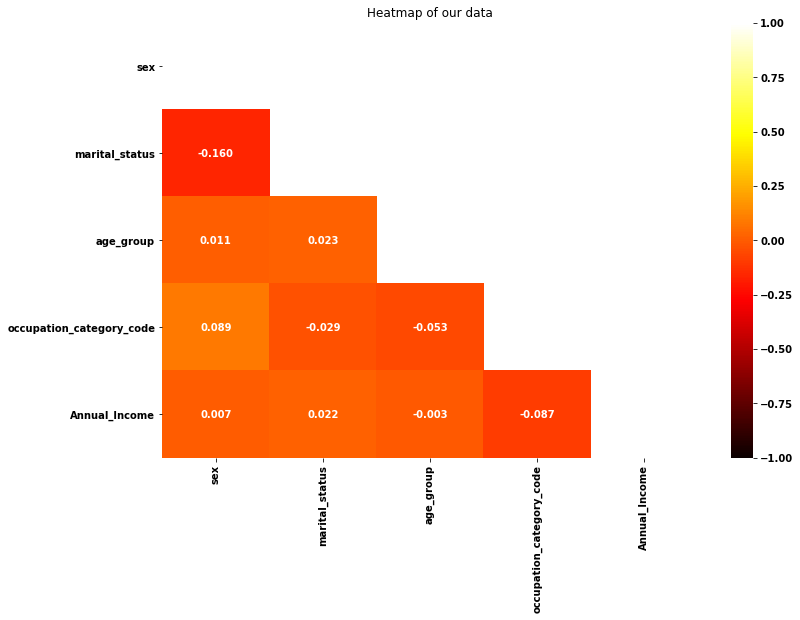

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Heatmap of our data')
corr = df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr,mask = mask, annot=True,fmt='.3f',vmin=-1, vmax=1, center= 0,cmap='hot')
plt.show()

### Since the features are highly independent of each other, it looks like it would be best if the data is modeled on those algorithms which work on independent data points best

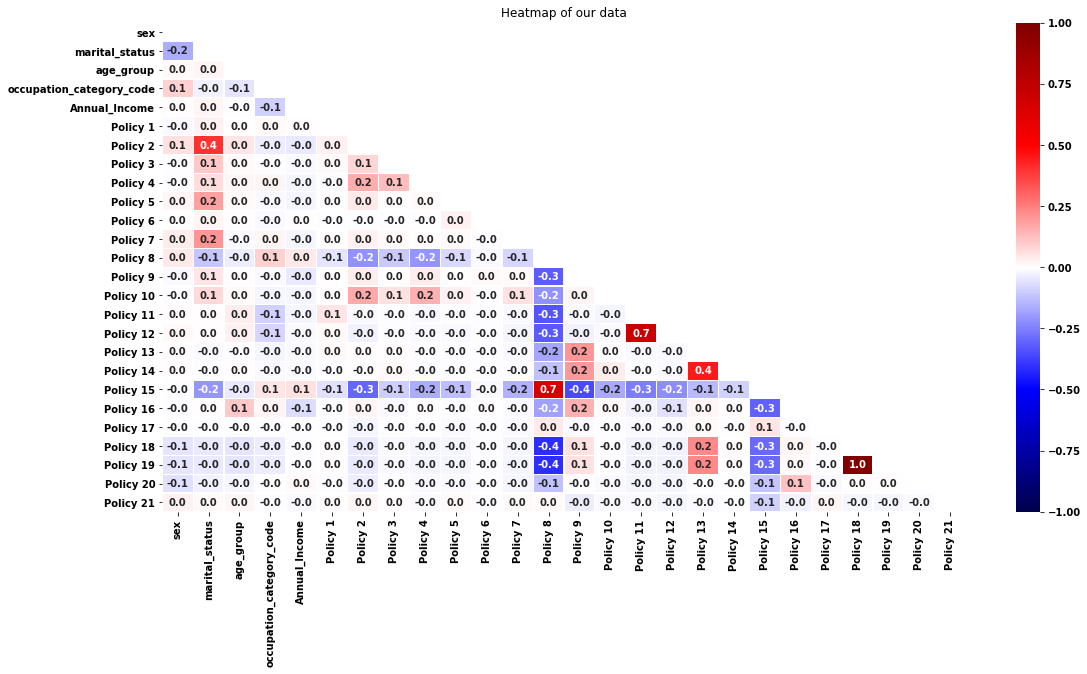

In [ ]:
plt.figure(figsize=(18, 9))
plt.title('Heatmap of our data')
corr = df_.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr,mask = mask, annot=True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='seismic',linewidths=0.1)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

### **<font color = 'purple'> After viewing this correlation plot we note the following </font>**
###**1. Policy 8 and Policy 15 are highly correlated, which means majority of those who were recommended policy 8 were also recommended policy 15 and vice versa**

### **2. Marital status determines to some extent whether a user will be recommended policy 2 or not**

### **3. Policy 13 and Policy 14 are somewhat correlated, which means some of those who were recommended policy 13 were also recommended policy 14 and vice versa**

### **4. People being recommended policy 8 are a little likely not to be recommended policy 18,19 and 9,11,12**

### **5. Policy 11 and Policy 12 are highly correlated, which means majority of those who were recommended policy 11 were also recommended policy 12 and vice versa**

### **6. Those who are recommended policy 15 are a little less likely to be recommended policy 18 and 19**

### **7. Policy 18 and 19 are totally correlated (maybe an anomaly in dataset)**





In [ ]:
transpose_df = pd.melt(data,id_vars=['ID', 'sex', 'marital_status', 'age_group', 'occupation_category_code','Annual_Income'],value_vars=data.columns[6:]).sort_values('ID')
transpose_df = transpose_df.loc[transpose_df.value ==1]

In [ ]:
transpose_df = transpose_df.reset_index()

In [ ]:
transpose_df = transpose_df[['ID','sex','marital_status','age_group','occupation_category_code','Annual_Income','variable']]

In [ ]:
transpose_df.head()

,ID,sex,marital_status,age_group,occupation_category_code,Annual_Income,variable
0,001IIBS,F,M,25-40,Self Employed,10-20 lac,Policy 15
1,001IIBS,F,M,25-40,Self Employed,10-20 lac,Policy 8
2,004GTNW,M,M,25-40,Medical Professional,10-20 lac,Policy 15
3,004GTNW,M,M,25-40,Medical Professional,10-20 lac,Policy 8
4,005FWAD,M,S,41-60,Corporate Employee,10-20 lac,Policy 15


In [ ]:
transpose_df_ = df = pd.DataFrame(transpose_df[transpose_df.columns[1:]].apply(preprocessing.LabelEncoder().fit_transform))

[]

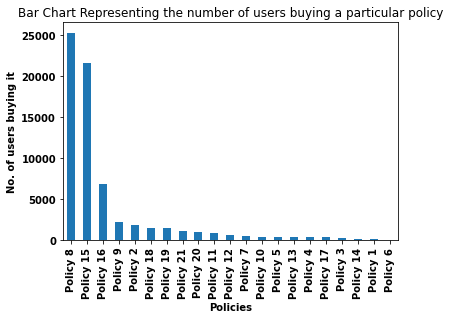

In [ ]:
transpose_df.variable.value_counts().plot.bar(title = "Bar Chart Representing the number of users buying a particular policy", xlabel = "Policies", ylabel = "No. of users buying it")
plt.plot()

### The dataset in the above bar chart seems imbalanced as some few policy dominate the user base. We probably need to balance it before we model our predictions 